In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the sales file (adjust if needed)
sales_path = "sales.csv"

print("Loading sales.csv (may take some time)...")
df = pd.read_csv(sales_path)

# Ensure proper datatypes
df["date"] = pd.to_datetime(df["date"])

df.head()

Loading sales.csv (may take some time)...


In [1]:
# --- Parameters you can tune ---
MIN_AVG = 20   # minimum avg daily sales per store
MAX_AVG = 100   # maximum avg daily sales per store
MIN_NONZERO_RATIO = 0.7  # product must have sales on >= 80% of days

# --- Step 1: Pivot daily sales by item and store ---
daily = df.groupby(["date", "item_id", "store_id"])["quantity"].sum().reset_index()

# Build a dict to store candidates
candidates = []

for item, grp in daily.groupby("item_id"):
    stores_present = grp["store_id"].nunique()
    if stores_present < 4:
        continue  # must be in all 4 stores
    
    # Pivot to wide format (date x store)
    pivot = grp.pivot(index="date", columns="store_id", values="quantity").fillna(0)
    
    # Average daily sales per store
    avg_sales = pivot.mean()
    
    # Ratio of nonzero days per store
    nonzero_ratio = (pivot > 0).sum() / len(pivot)
    
    # Check conditions for ALL stores
    if all((MIN_AVG <= avg <= MAX_AVG) for avg in avg_sales) and all(nonzero_ratio >= MIN_NONZERO_RATIO):
        candidates.append({
            "item_id": item,
            "avg_sales_per_store": avg_sales.to_dict(),
            "nonzero_ratio": nonzero_ratio.to_dict()
        })

# Convert to DataFrame for inspection
candidates_df = pd.DataFrame(candidates)

print(f"Found {len(candidates_df)} candidate products.")
candidates_df


NameError: name 'df' is not defined

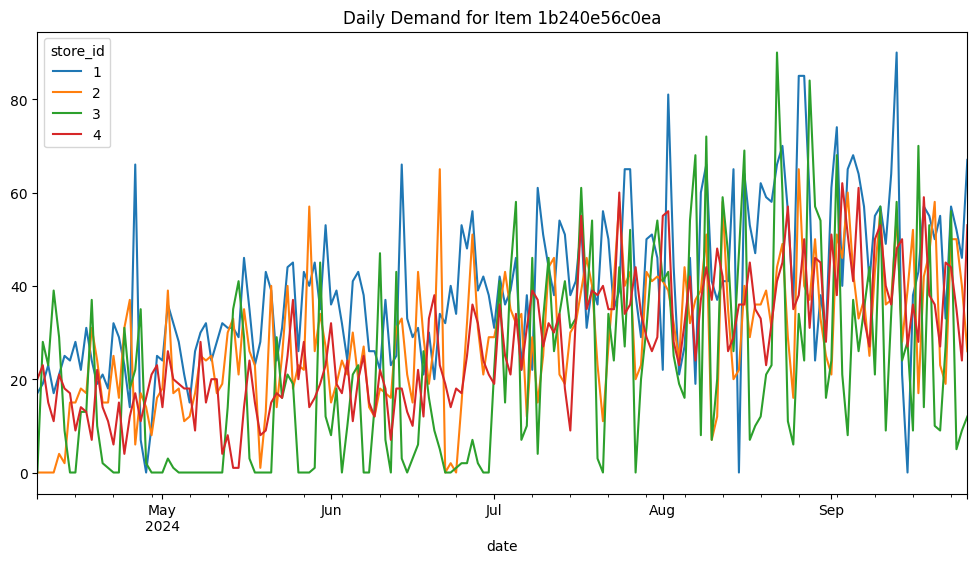

In [22]:
if not candidates_df.empty:
    chosen_item = candidates_df.iloc[1]["item_id"]  # pick the first candidate
    df_item = daily[daily["item_id"] == chosen_item]
    pivot_item = df_item.pivot(index="date", columns="store_id", values="quantity").fillna(0)
    pivot_item.plot(figsize=(12,6), title=f"Daily Demand for Item {chosen_item}")

In [ ]:
# good candidates: 1b240e56c0ea